In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

ModuleNotFoundError: No module named 'torch'

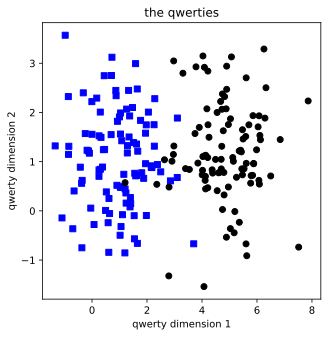

In [3]:
nPerClust=100
blur=1

A=[1,1]
B=[5,1]
a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur ]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur ]
labels_np=np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
data_np=np.hstack((a,b)).T
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
plt.title("the qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [4]:
print(type(data_np))
print(np.shape(data_np))
print()
print(type(data))
print(np.shape(data))
print(labels_np.shape)

<class 'numpy.ndarray'>
(200, 2)

<class 'torch.Tensor'>
torch.Size([200, 2])
(200, 1)


In [5]:
ANNclassify=nn.Sequential(nn.Linear(2,1), nn.ReLU(), nn.Linear(1,1),
                         nn.Sigmoid(),)
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [6]:
learningRate=0.01
lossfun=nn.BCELoss()
optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)


In [7]:
numepoches=1000
losses=torch.zeros(numepoches)
for epochi in range(numepoches):
    yHat=ANNclassify(data)
    loss=lossfun(yHat,labels)
    losses[epochi]=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [8]:
losses

tensor([0.8626, 0.8599, 0.8572, 0.8545, 0.8518, 0.8491, 0.8465, 0.8439, 0.8413,
        0.8388, 0.8363, 0.8338, 0.8313, 0.8288, 0.8264, 0.8239, 0.8215, 0.8191,
        0.8167, 0.8143, 0.8120, 0.8096, 0.8073, 0.8049, 0.8026, 0.8003, 0.7980,
        0.7957, 0.7934, 0.7911, 0.7888, 0.7865, 0.7841, 0.7819, 0.7796, 0.7774,
        0.7752, 0.7730, 0.7708, 0.7686, 0.7665, 0.7644, 0.7623, 0.7602, 0.7581,
        0.7560, 0.7540, 0.7519, 0.7499, 0.7479, 0.7459, 0.7440, 0.7420, 0.7401,
        0.7381, 0.7362, 0.7343, 0.7325, 0.7306, 0.7287, 0.7269, 0.7251, 0.7233,
        0.7215, 0.7197, 0.7180, 0.7162, 0.7144, 0.7127, 0.7109, 0.7092, 0.7075,
        0.7057, 0.7040, 0.7024, 0.7007, 0.6990, 0.6973, 0.6956, 0.6940, 0.6923,
        0.6907, 0.6890, 0.6874, 0.6858, 0.6842, 0.6826, 0.6810, 0.6794, 0.6778,
        0.6763, 0.6747, 0.6732, 0.6717, 0.6702, 0.6686, 0.6672, 0.6657, 0.6642,
        0.6627, 0.6613, 0.6598, 0.6583, 0.6569, 0.6555, 0.6540, 0.6526, 0.6512,
        0.6498, 0.6484, 0.6471, 0.6457, 

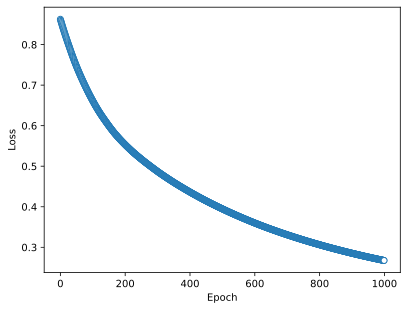

In [9]:
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=-.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [9]:
preds=ANNclassify(data)
predlabels=preds>0.5
idx_missclassified=np.where(predlabels!=labels)[0]
totalacc=100-100*len(idx_missclassified)/(2*nPerClust)
print(f"final accuracy {totalacc}")

final accuracy 74.0


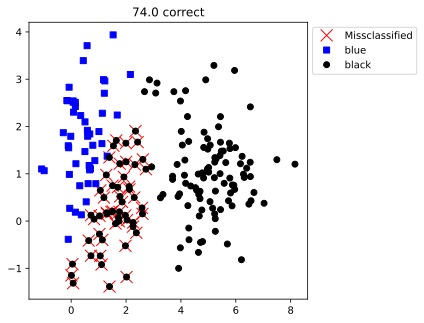

In [10]:
fig=plt.figure(figsize=(5,5))
plt.plot(data[idx_missclassified,0],data[idx_missclassified,1],'rx',markersize=12)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')
plt.legend(['Missclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f"{totalacc} correct")
plt.show()

In [11]:
predlabels[0]

tensor([True])

In [12]:
np.where(~predlabels)[0]

array([ 4,  6,  7, 14, 15, 16, 17, 19, 20, 21, 25, 27, 33, 34, 35, 36, 37,
       41, 43, 44, 46, 51, 52, 56, 60, 61, 62, 63, 65, 66, 68, 69, 71, 74,
       75, 78, 79, 81, 83, 85, 88, 89, 90, 92, 93, 97, 98, 99])

In [13]:
def createANNmodel(learningRate):
    ANNclassify=nn.Sequential(nn.Linear(2,1),nn.ReLU(),nn.Linear(1,1))
    lossfun=nn.BCEWithLogitsLoss()
    optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
    return ANNclassify,lossfun,optimizer

In [14]:
numepoches=1000
def trainTheModel(ANNmodel):
    losses=torch.zeros(numepoches)
    for epochi in range(numepoches):
        yHat=ANNmodel(data)
        loss=lossfun(yHat,labels)
        losses[epochi]=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions=ANNmodel(data)
    totalacc=100*torch.mean(((predictions>0)==labels).float())
    return losses,predictions,totalacc

In [15]:
ANNclassify,lossfun,optimizer=createANNmodel(0.01)

In [16]:
losses,predictions,totalacc=trainTheModel(ANNclassify)

In [17]:
print(f"final accuracy is {totalacc}")

final accuracy is 50.0


Text(0, 0.5, 'Loss')

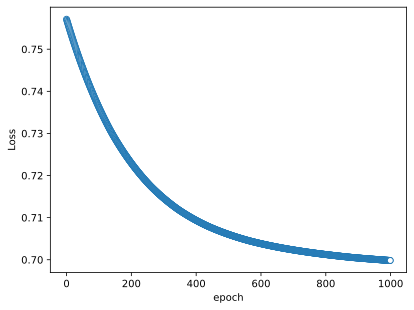

In [18]:
plt.plot(losses.detach(),'o',markerfacecolor='w')
plt.xlabel('epoch')
plt.ylabel('Loss')

In [19]:
learningRates=np.linspace(0.001,0.1,40)
accByLr=[]
allLosses=np.zeros((len(learningRates),numepoches))
for i,lr in enumerate(learningRates):
    ANNclassify,lossfun,optimizer=createANNmodel(lr)
    losses,predictions,totalacc=trainTheModel(ANNclassify)
    accByLr.append(totalacc)
    allLosses[i,:]=losses.detach()

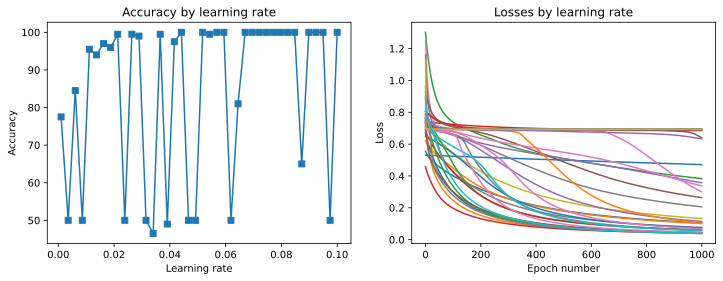

In [20]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learningRates,accByLr,'s-')
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by learning rate")
ax[1].plot(allLosses.T)
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
ax[1].set_title("Losses by learning rate")
plt.show()

In [21]:
sum(torch.tensor(accByLr)>90)/len(accByLr)

tensor(0.6500)

In [22]:
numExps=50
accMeta=np.zeros((numExps,len(learningRates)))
numepoches=500
for expi in range(numExps):
    for i,lr in enumerate(learningRates):
        ANNclassify,lossfun,optimizer=createANNmodel(lr)
        losses,predictions,totalacc=trainTheModel(ANNclassify)
        accMeta[expi,i]=totalacc

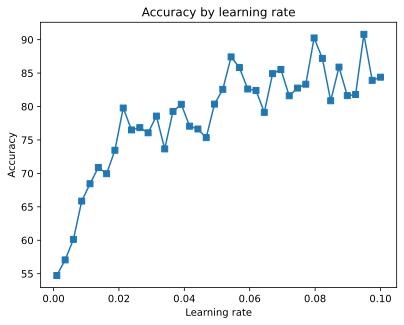

In [23]:
plt.plot(learningRates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title("Accuracy by learning rate")
plt.show()

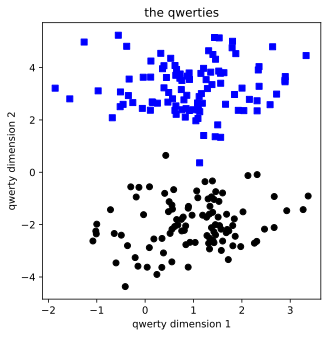

In [24]:
 nPerClust=100
blur=1

A=[1,3]
B=[1,-2]
a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur ]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur ]
labels_np=np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
data_np=np.hstack((a,b)).T
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
plt.title("the qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [25]:
def createANNmodel(learningRate):
    ANNclassify=nn.Sequential(nn.Linear(2,16),
                              nn.ReLU(),
                              nn.Linear(16,1),
                              nn.ReLU(),
                              nn.Linear(1,1),
                             nn.Sigmoid())
    lossfun=nn.BCELoss()
    optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
    return ANNclassify,lossfun,optimizer

In [26]:
numepoches=1000
def trainTheModel(ANNmodel):
    losses=torch.zeros(numepoches)
    for epochi in range(numepoches):
        yHat=ANNmodel(data)
        loss=lossfun(yHat,labels)
        losses[epochi]=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions=ANNmodel(data)
    totalacc=100*torch.mean(((predictions>0.5)==labels).float())
    return losses,predictions,totalacc

final accuracy is 99.0 


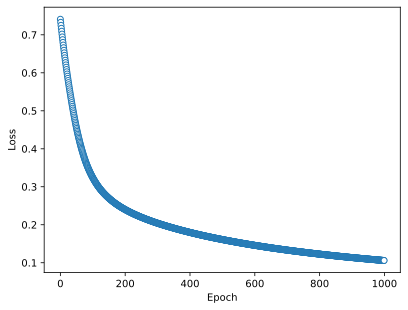

In [27]:
ANNclassify,lossfun,optimizer=createANNmodel(0.01)
losses,predictions,totalacc=trainTheModel(ANNclassify)
print(f'final accuracy is {totalacc} ')
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [28]:
learningRates=np.linspace(0.001,0.1,40)
accByLr=[]
allLosses=np.zeros((len(learningRates),numepoches))
for i,lr in enumerate(learningRates):
    ANNclassify,lossfun,optimizer=createANNmodel(lr)
    losses,predictions,totalacc=trainTheModel(ANNclassify)
    accByLr.append(totalacc)
    allLosses[i,:]=losses.detach()

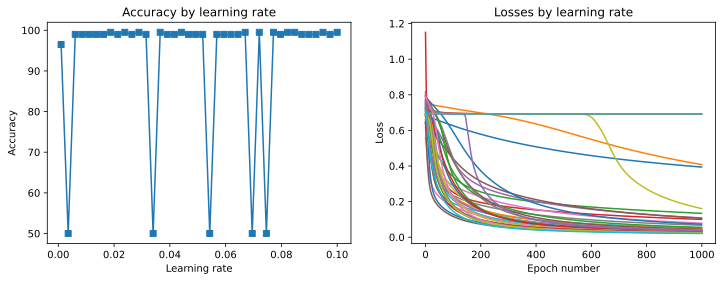

In [29]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learningRates,accByLr,'s-')
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by learning rate")
ax[1].plot(allLosses.T)
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
ax[1].set_title("Losses by learning rate")
plt.show()

In [30]:
sum(torch.tensor(accByLr)>90)/len(accByLr)

tensor(0.8750)

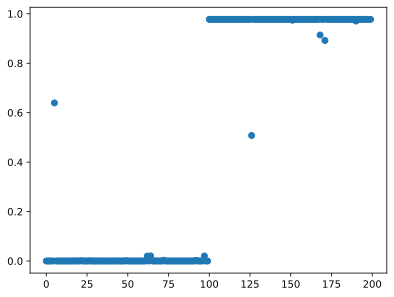

In [33]:
plt.plot(predictions.detach(),'o')

In [42]:
torch.mean(((predictions>0.5)==labels).float())

tensor(0.9950)

In [50]:
def createANNmodel(learningRate):
    ANNclassify=nn.Sequential(nn.Linear(2,1),
                              
        
                              
                              
                             nn.Sigmoid())
    lossfun=nn.BCELoss()
    optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
    return ANNclassify,lossfun,optimizer

In [51]:
numepoches=1000
def trainTheModel(ANNmodel):
    losses=torch.zeros(numepoches)
    for epochi in range(numepoches):
        yHat=ANNmodel(data)
        loss=lossfun(yHat,labels)
        losses[epochi]=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions=ANNmodel(data)
    totalacc=100*torch.mean(((predictions>0.5)==labels).float())
    
    return losses,predictions,totalacc

final accuracy is 99.5 


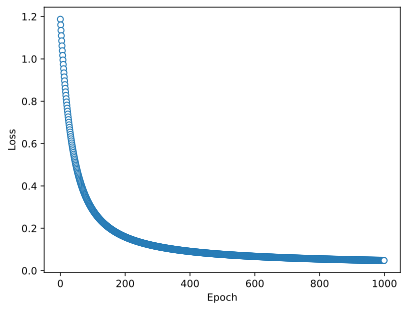

In [52]:
ANNclassify,lossfun,optimizer=createANNmodel(0.01)
losses,predictions,totalacc=trainTheModel(ANNclassify)
print(f'final accuracy is {totalacc} ')
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [53]:
learningRates=np.linspace(0.001,0.1,40)
accByLr=[]
allLosses=np.zeros((len(learningRates),numepoches))
for i,lr in enumerate(learningRates):
    ANNclassify,lossfun,optimizer=createANNmodel(lr)
    losses,predictions,totalacc=trainTheModel(ANNclassify)
    accByLr.append(totalacc)
    allLosses[i,:]=losses.detach()

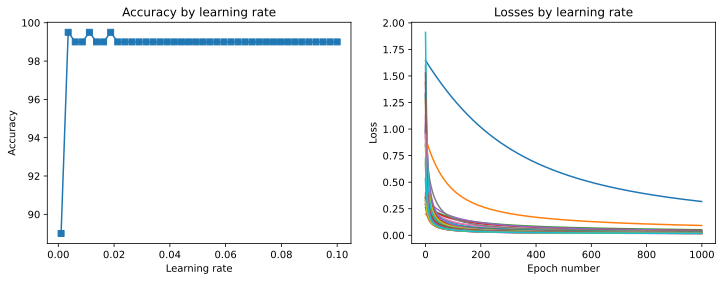

In [54]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learningRates,accByLr,'s-')
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by learning rate")
ax[1].plot(allLosses.T)
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
ax[1].set_title("Losses by learning rate")
plt.show()

In [55]:
sum(torch.tensor(accByLr)>90)/len(accByLr)

tensor(0.9750)